In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import itertools

from scipy.stats import pearsonr, spearmanr, zscore
from sklearn.metrics import r2_score

import os
from statsmodels.stats.multitest import multipletests

from tqdm import tqdm
import subprocess as sp

In [8]:
slopes1 = pd.read_csv('../code/IntronSlopes/slopes/NA19137.IntronWindows.glm_nb.tab.gz',
                     sep='\t', index_col=0)

slopes1 = slopes1.dropna()

slopes2 = pd.read_csv('../code/IntronSlopes/slopes/NA19238.IntronWindows.glm_nb.tab.gz',
                     sep='\t', index_col=0)

slopes2 = slopes2.dropna()

In [9]:
def plot_slopes(sample1, sample2, method='spearman'):
    
    
    slopes1 = sample1.Slope
    slopes2 = sample2.Slope
    
    
    fig, ax = plt.subplots(figsize=(5, 5))
    
    
    vmax = np.max((np.max(slopes1), np.max(slopes2))) 
    vmin = np.min((np.min(slopes1), np.min(slopes2))) 
    
    pad = np.abs(vmax - vmin)/20
    
    vmax += pad
    
    vmin = vmin - pad
    
    
    ax.plot([vmin, vmax], [0,0], 'r--', alpha=0.5)
    ax.plot([0,0], [vmin, vmax], 'r--', alpha=0.5)
    ax.scatter(slopes1, slopes2, c='black', alpha=0.2, linewidth=0)
    
#     r2 = round(r2_score(slopes1, slopes2),2)
#     ax.text(0.8, 0.1,'R2 = ' + str(r2), ha='center', va='center', transform=ax.transAxes)
    
    if method == 'spearman':
        r2 = round(spearmanr(slopes1, slopes2)[0],2)
        ax.text(0.8, 0.15,'Spearman', ha='center', va='center', transform=ax.transAxes)
        ax.text(0.8, 0.1,'r = ' + str(r2), ha='center', va='center', transform=ax.transAxes)
        
    elif method == 'pearson':
        r2 = round(pearsonr(slopes1, slopes2)[0],2)
        ax.text(0.8, 0.15,'Pearson', ha='center', va='center', transform=ax.transAxes)
        ax.text(0.8, 0.1,'r = ' + str(r2), ha='center', va='center', transform=ax.transAxes)
        
    elif method == 'r2_score':
        r2 = round(r2_score(slopes1, slopes2),2)
#         ax.text(0.8, 0.15,'Spearman', ha='center', va='center', transform=ax.transAxes)
        ax.text(0.79, 0.1,'R2 = ' + str(r2), ha='center', va='center', transform=ax.transAxes)
    
    
    
    
    neg_neg = round(np.mean(sample1.IsSlopeNegative & sample2.IsSlopeNegative)*100)
    neg_pos = round(np.mean(sample1.IsSlopeNegative & ~sample2.IsSlopeNegative)*100)
    pos_neg = round(np.mean(~sample1.IsSlopeNegative & sample2.IsSlopeNegative)*100)
    pos_pos = round(100 - neg_neg - neg_pos - pos_neg)
    
    if (neg_neg >= 0 ) and (neg_neg < 1 ):
        neg_neg = '<1'
    if (neg_pos >= 0 ) and (neg_pos < 1 ):
        neg_pos = '<1'
    if (pos_neg >= 0 ) and (pos_neg < 1 ):
        pos_neg = '<1'
    if (pos_pos >= 0 ) and (pos_pos < 1 ):
        pos_pos = '<1'
    
    ax.text(0.06, 0.03, str(neg_neg) + '%', ha='center', va='center', transform=ax.transAxes)
    
    ax.text(0.06, 0.96, str(neg_pos) + '%', ha='center', va='center', transform=ax.transAxes)
    
    ax.text(0.94, 0.03, str(pos_neg) + '%', ha='center', va='center', transform=ax.transAxes)
    
    ax.text(0.94, 0.96, str(pos_pos) + '%', ha='center', va='center', transform=ax.transAxes)
    
    
    ax.set_xlim((vmin, vmax))
    ax.set_ylim((vmin, vmax))
    ax.set_xlabel('Sample 1')
    ax.set_ylabel('Sample 2')
    ax.set_title('Slopes 100 windows')
    plt.show()

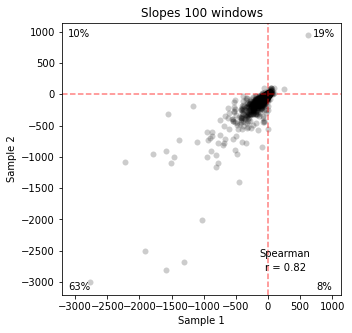

In [15]:
# slopes1 = slopes1.loc[(slopes1.coverageMean >= 0.95) & (slopes1.counts >= 1000) & (slopes1.IntronLength >= 10000)].copy()
# slopes2 = slopes2.loc[(slopes2.coverageMean >= 0.95) & (slopes2.counts >= 1000) & (slopes2.IntronLength >= 10000)].copy()

shared_idx = slopes1.dropna().index.intersection(slopes2.dropna().index)
plot_slopes(slopes1.loc[shared_idx], slopes2.loc[shared_idx], method='spearman')

In [121]:
slopes1['std.error'].sort_values()[:1000]

IntronName
ENSG00000204104.12_chr2_238338457_238344496_+    0.000107
ENSG00000137857.17_chr15_45155929_45160836_+     0.000114
ENSG00000141540.11_chr17_74215712_74222484_+     0.000117
ENSG00000155530.3_chr7_134163540_134174555_+     0.000118
ENSG00000124635.9_chr6_27126462_27132366_-       0.000129
                                                   ...   
ENSG00000164111.15_chr4_121672626_121677893_-    0.228575
ENSG00000177932.7_chr5_179062095_179076444_+     0.228708
ENSG00000056586.16_chr9_122860131_122865348_-    0.228718
ENSG00000138336.9_chr10_68574252_68600980_+      0.228793
ENSG00000101353.14_chr20_37129167_37137809_-     0.228803
Name: std.error, Length: 1000, dtype: float64

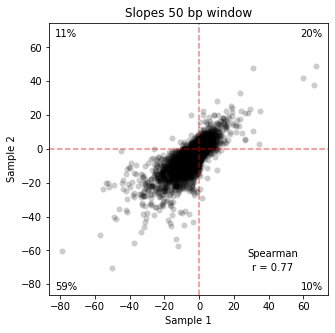

In [122]:
slopes1_sig = slopes1['std.error'].sort_values()[:10000].index
slopes2_sig = slopes2['std.error'].sort_values()[:10000].index

shared_sig = slopes1_sig.intersection(slopes2_sig)

plot_slopes(slopes1.loc[shared_sig], slopes2.loc[shared_sig], 'spearman')

In [90]:
shared_sig

Index(['ENSG00000158623.14_chr7_130550649_130551240_-',
       'ENSG00000128512.23_chr7_112004131_112206101_-',
       'ENSG00000169213.7_chr1_51937412_51976889_-',
       'ENSG00000164161.10_chr4_144659838_144706530_+',
       'ENSG00000134532.19_chr12_23665564_23734683_-',
       'ENSG00000124203.6_chr20_59207056_59252977_+',
       'ENSG00000107957.16_chr10_103767169_103801281_-',
       'ENSG00000157570.12_chr11_44860469_44906406_+',
       'ENSG00000114757.19_chr3_179819976_179859061_-',
       'ENSG00000120594.17_chr10_20177409_20211668_+',
       ...
       'ENSG00000140836.17_chr16_72800129_72811576_-',
       'ENSG00000188959.9_chr9_110201474_110207386_-',
       'ENSG00000008277.14_chr7_88156006_88163011_+',
       'ENSG00000055130.17_chr7_148730262_148753975_+',
       'ENSG00000119977.21_chr10_95664300_95680471_-',
       'ENSG00000163354.15_chr1_155018760_155023116_-',
       'ENSG00000104205.16_chr8_66831311_66835762_+',
       'ENSG00000133265.11_chr19_55266286_55274397_

In [123]:
slopes2.loc['ENSG00000184384.14_chr11_96093517_96341382_-']

gene               ENSG00000184384.14
IntChr                          chr11
IntStart                     96093517
IntStop                      96341382
IntStrand                           -
(Intercept)               2116.034923
Slope                    -1961.708719
IntronLength                   247865
std.error                   80.710516
counts                         113004
coverageMean                      1.0
IsSlopeNegative                  True
Name: ENSG00000184384.14_chr11_96093517_96341382_-, dtype: object

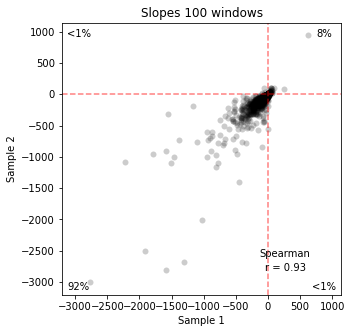

In [14]:
# slopes1 = slopes1.loc[(slopes1.coverageMean >= 0.9) & (slopes1.counts >= 10000) & (slopes1.IntronLength >= 10000)].copy()
# slopes2 = slopes2.loc[(slopes2.coverageMean >= 0.9) & (slopes2.counts >= 10000) & (slopes1.IntronLength >= 10000)].copy()

s1_fdr = multipletests(slopes1.dropna()['Slope.p.value'], method='fdr_bh', alpha=0.25)
slopes1['Slope.FDR'] = s1_fdr[1]
slopes1['Slope.IsSignificant'] = s1_fdr[0]
intercept1_fdr = multipletests(slopes1.dropna()['Intercept.p.value'], method='fdr_bh', alpha=0.25)
slopes1['Intercept.FDR'] = intercept1_fdr[1]
slopes1['Intercept.IsSignificant'] = intercept1_fdr[0]
slopes1['IsSignificant'] = slopes1['Slope.IsSignificant'] & slopes1['Intercept.IsSignificant']
slopes1_sig = slopes1.loc[slopes1.IsSignificant].index

s2_fdr = multipletests(slopes2.dropna()['Slope.p.value'], method='fdr_bh', alpha=0.25)
slopes2['Slope.FDR'] = s2_fdr[1]
slopes2['Slope.IsSignificant'] = s2_fdr[0]
intercept2_fdr = multipletests(slopes2.dropna()['Intercept.p.value'], method='fdr_bh', alpha=0.25)
slopes2['Intercept.FDR'] = intercept2_fdr[1]
slopes2['Intercept.IsSignificant'] = intercept2_fdr[0]
slopes2['IsSignificant'] = slopes2['Slope.IsSignificant'] & slopes2['Intercept.IsSignificant']
slopes2_sig = slopes2.loc[slopes2.IsSignificant].index

shared_sig = slopes1_sig.intersection(slopes2_sig)

plot_slopes(slopes1.loc[shared_sig], slopes2.loc[shared_sig], 'spearman')

In [16]:
shared_sig

Index(['ENSG00000000419.12_chr20_50948662_50955185_-',
       'ENSG00000001629.10_chr7_92246519_92294888_+',
       'ENSG00000001629.10_chr7_92352642_92362184_+',
       'ENSG00000001629.10_chr7_92371607_92386508_+',
       'ENSG00000001631.15_chr7_92214777_92221901_-',
       'ENSG00000002549.12_chr4_17588977_17595409_+',
       'ENSG00000002587.10_chr4_11400113_11428698_-',
       'ENSG00000002822.15_chr7_1816228_1898199_-',
       'ENSG00000002822.15_chr7_1957719_1980452_-',
       'ENSG00000002822.15_chr7_2069338_2149151_-',
       ...
       'ENSG00000277149.5_chr7_72777533_72802399_-',
       'ENSG00000278540.5_chr17_37162050_37179259_-',
       'ENSG00000283199.3_chr13_113956839_113964926_-',
       'ENSG00000283886.3_chr9_39818924_39873909_-',
       'ENSG00000284484.1_chr16_75661249_75669362_-',
       'ENSG00000284512.1_chr16_81024605_81034754_-',
       'ENSG00000285441.1_chr6_159730965_159748537_-',
       'ENSG00000285458.1_chr4_86926326_86932221_-',
       'ENSG0000028586

In [38]:
len(slopes1.loc[(slopes1.coverageMean >= 0.25) & (slopes1.counts >= 10)])#.IsSlopeNegative.mean()

8012

In [27]:
slopes2.loc[slopes2.coverageMean >= 0.9]

,Gene,IntChr,IntStart,IntStop,IntStrand,Intercept,Slope,IntronLength,Slope.p.value,Intercept.p.value,counts,coverageMean,IsSlopeNegative,Slope.FDR,Slope.IsSignificant,Intercept.FDR,Intercept.IsSignificant,IsSignificant
IntronName,,,,,,,,,,,,,,,,,,
ENSG00000019582.15_chr5_150407324_150412624_-,ENSG00000019582.15,chr5,150407324,150412624,-,8.470250,-0.000239,5300,0.490454,1.532098e-14,799,0.962264,True,1.0,False,5.574980e-13,True,False
ENSG00000110777.12_chr11_111354575_111357444_-,ENSG00000110777.12,chr11,111354575,111357444,-,5.361076,-0.000027,2869,0.956565,2.133932e-10,282,0.913793,True,1.0,False,4.908800e-09,True,False
ENSG00000137265.15_chr6_398935_401423_+,ENSG00000137265.15,chr6,398935,401423,+,10.580373,-0.000481,2488,0.736331,1.331493e-06,448,0.900000,True,1.0,False,1.639515e-05,True,False
ENSG00000137265.15_chr6_401777_405017_+,ENSG00000137265.15,chr6,401777,405017,+,5.650186,-0.000435,3240,0.383684,8.313401e-09,302,0.938462,True,1.0,False,1.535779e-07,True,False
ENSG00000157601.14_chr21_41441025_41441715_+,ENSG00000157601.14,chr21,41441025,41441715,+,2.457437,-0.001087,690,0.633048,9.337091e-03,27,0.928571,True,1.0,False,3.294166e-02,True,False


In [129]:
slopes = pd.read_csv("../code/IntronSlopes/IntronWindowCounts/NA18522.IntronWindows.bed.gz", sep='\t',
                     names = ['chrom', 'start', 'end', 'bin', 'score', 'strand', 'counts'])

In [146]:
intron = ['_'.join(i.split('_')[:-1]) for i in slopes.bin]

In [147]:
slopes['intron'] = intron

In [148]:
sum_counts = slopes.groupby('intron').sum('counts')

In [149]:
sum_counts.loc[sum_counts.counts >= 100]

,start,end,counts
intron,,,
ENSG00000000419.12_chr20_50948662_50955185_-,5095187950,5095194473,272
ENSG00000000457.14_chr1_169878819_169888675_-,16988367000,16988376856,725
ENSG00000000938.13_chr1_27621657_27623041_-,2762230050,2762231434,229
ENSG00000001561.7_chr6_46130189_46139550_+,4613479250,4613488611,241
ENSG00000001629.10_chr7_92246519_92294888_+,9227042750,9227091119,8469
...,...,...,...
ENSG00000285868.1_chr5_157345816_157361460_-,15735353800,15735369444,2451
ENSG00000285868.1_chr5_157376506_157460007_-,15741783850,15741867351,5534
ENSG00000286019.1_chr1_148615950_148640015_-,14862783000,14862807065,370


In [154]:
slopes.loc[slopes.intron == 'ENSG00000000938.13_chr1_27621657_27623041_-'].counts

140500      0
140501      0
140502      0
140503      0
140504      0
         ... 
140595      0
140596      0
140597      0
140598      0
140599    229
Name: counts, Length: 100, dtype: int64